# Regression Practice 1
** In this practice project I've gone over how we can use statistics to manualy select features as well as how to interaction features into the model in order to improve performance **

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from regressors import stats

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
sub_data = data[['OverallQual','OverallCond','YearBuilt','YearRemodAdd','1stFlrSF','TotRmsAbvGrd','FullBath','LotFrontage','LotArea','SalePrice']]
sub_data = sub_data.dropna()

In [26]:
sub_data.head()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,TotRmsAbvGrd,FullBath,LotFrontage,LotArea,SalePrice
0,7,5,2003,2003,856,8,2,65.0,8450,208500
1,6,8,1976,1976,1262,6,2,80.0,9600,181500
2,7,5,2001,2002,920,6,2,68.0,11250,223500
3,7,5,1915,1970,961,7,1,60.0,9550,140000
4,8,5,2000,2000,1145,9,2,84.0,14260,250000


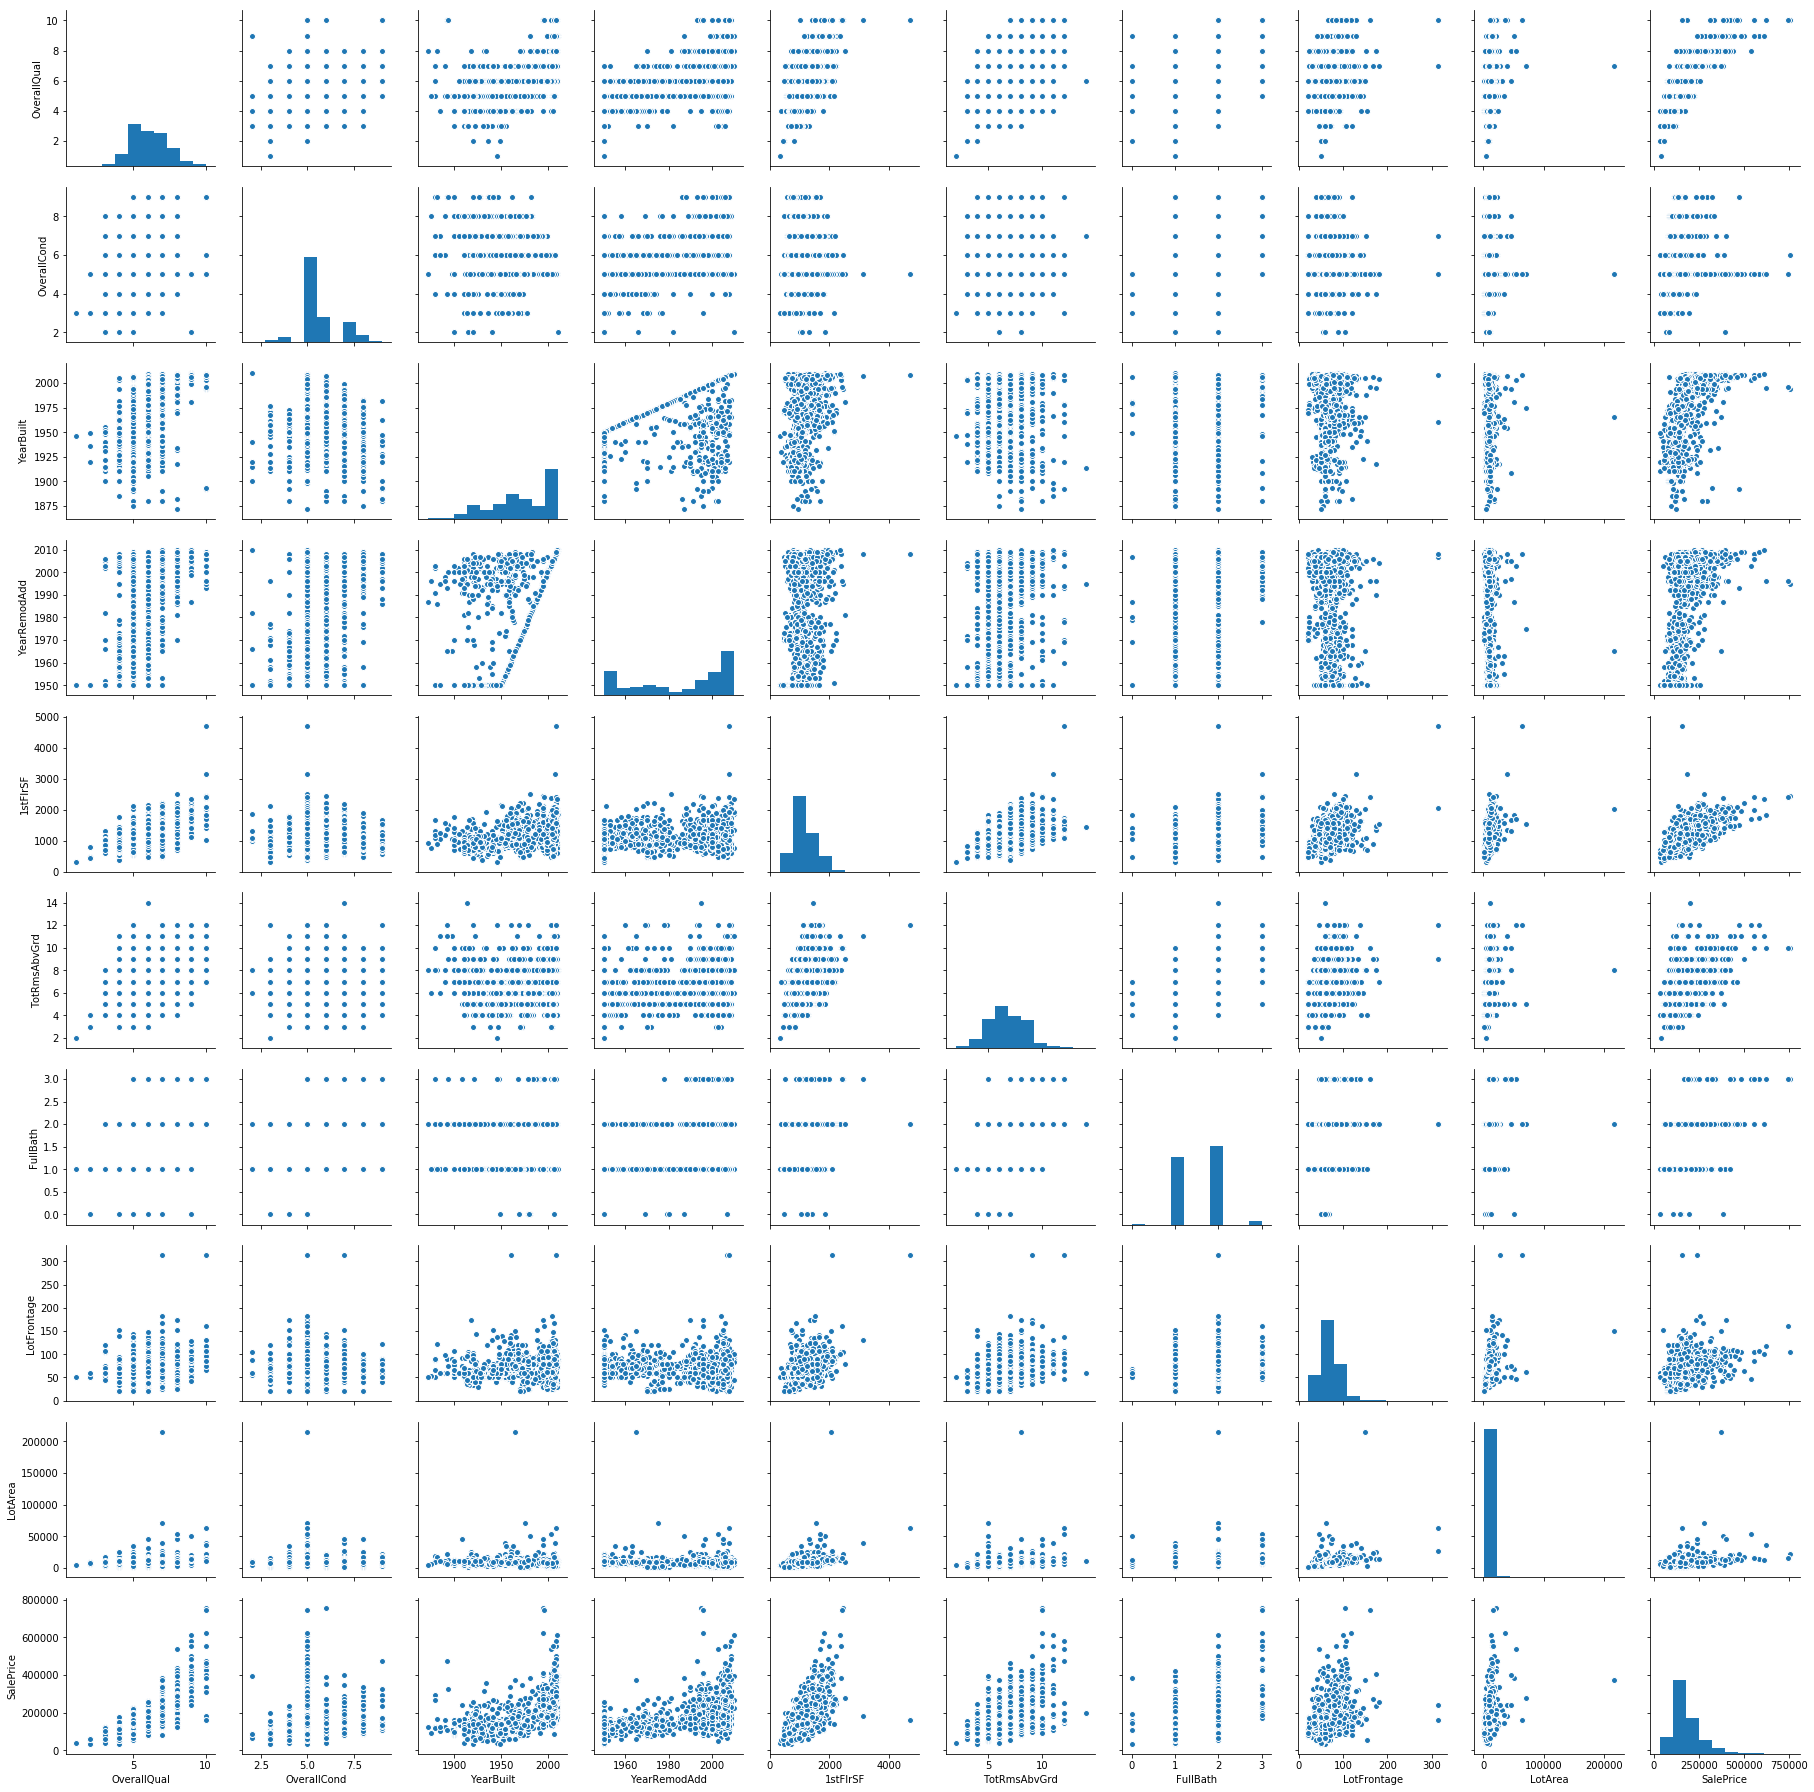

In [27]:
sns.pairplot(sub_data)

In [28]:
X = sub_data[['OverallQual','OverallCond','YearBuilt','YearRemodAdd','1stFlrSF','TotRmsAbvGrd','FullBath','LotFrontage','LotArea']]
y = sub_data['SalePrice']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [31]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
OverallQual,27595.282888
OverallCond,3216.090373
YearBuilt,394.976808
YearRemodAdd,328.525621
1stFlrSF,34.002733
TotRmsAbvGrd,9575.605243
FullBath,-673.496824
LotFrontage,-112.169003
LotArea,1.340850


In [48]:
xlabels = list(sub_data.columns)[:-1]
stats.summary(lm, X_train,y_train,xlabels)

Residuals:
Min           1Q       Median           3Q          Max
-66741.5236  128093.1363  171869.7759  222872.9209  524315.8908


Coefficients:
                  Estimate     Std. Error  t value   p value
_intercept   -1.544165e+06  195345.235884  -7.9048  0.000000
OverallQual   2.759528e+04    1494.911852  18.4595  0.000000
OverallCond   3.216090e+03    1700.221749   1.8916  0.058950
YearBuilt     3.949768e+02      46.811789   8.4376  0.000000
YearRemodAdd  3.285256e+02      45.890017   7.1590  0.000000
1stFlrSF      3.400273e+01       4.578626   7.4264  0.000000
TotRmsAbvGrd  9.575605e+03    1200.427373   7.9768  0.000000
FullBath     -6.734968e+02    3739.198769  -0.1801  0.857111
LotFrontage  -1.121690e+02      82.079377  -1.3666  0.172180
LotArea       1.340850e+00       0.213338   6.2851  0.000000
---
R-squared:  0.73133,    Adjusted R-squared:  0.72792
F-statistic: 214.74 on 9 features


** Full bath and lot frontage are not significant **

In [32]:
predictions = lm.predict(X_test)

C:\Users\amira\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


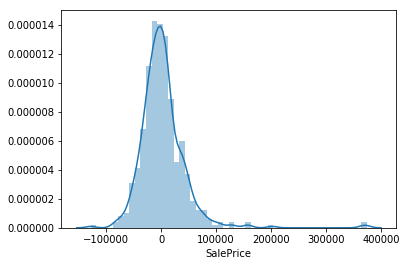

In [33]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
import math
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [41]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(y_test, predictions)))

MAE: 27071.68825060035
MSE: 1832668720.4280994
RMSE: 42809.6802187087
RMSLE: 0.20138689369163207


** Adding two new features modeling the first order interactions of construction year and remodelling year as well as overal quality and overal condition of the house **

In [50]:
sub_data['YBXYR']=sub_data['YearBuilt']*sub_date['YearRemodAdd']
sub_data['OQXOC']=sub_data['OverallQual']*sub_date['OverallCond']

In [63]:
X = sub_data.drop(['SalePrice','LotFrontage','FullBath'],axis=1)
y = sub_data['SalePrice']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lm2 = LinearRegression()
lm2.fit(X_train,y_train)
coeff_df = pd.DataFrame(lm2.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
OverallQual,33195.956229
OverallCond,10852.557663
YearBuilt,-14817.229571
YearRemodAdd,-14597.885174
1stFlrSF,32.621972
TotRmsAbvGrd,9139.997277
LotArea,1.127126
YBXYR,7.640338
OQXOC,-1261.744018


In [68]:
xlabels = list(X.columns)
stats.summary(lm2, X_train,y_train,xlabels)

Residuals:
Min          1Q       Median           3Q          Max
-74672.7838  127197.352  170452.4161  223368.9251  534629.0478


Coefficients:
                  Estimate    Std. Error     t value   p value
_intercept    2.813596e+07  1.204225e+07      2.3364  0.019742
OverallQual   3.319596e+04  5.433153e+03      6.1099  0.000000
OverallCond   1.085256e+04  5.471516e+03      1.9835  0.047696
YearBuilt    -1.481723e+04  9.686115e+01   -152.9739  0.000000
YearRemodAdd -1.459789e+04  6.339046e+01   -230.2852  0.000000
1stFlrSF      3.262197e+01  4.734428e+00      6.8904  0.000000
TotRmsAbvGrd  9.139997e+03  1.146587e+03      7.9715  0.000000
LotArea       1.127126e+00  3.274380e-01      3.4423  0.000610
YBXYR         7.640338e+00  4.260000e-04  17937.9566  0.000000
OQXOC        -1.261744e+03  3.587937e+02     -3.5166  0.000465
---
R-squared:  0.73341,    Adjusted R-squared:  0.73003
F-statistic: 217.02 on 9 features


In [69]:
predictions = lm2.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(y_test, predictions)))

MAE: 27136.93417937935
MSE: 1837448787.9187963
RMSE: 42865.47314469766
RMSLE: 0.19464762743791725


** RMSLE has improved while RMSE has suffered which means the model is probably doing better for higher value homes but not as good as before on lower value one **